In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN

In [4]:
df = pd.read_csv("./dataset/categorical_data_on_fraud.csv")
df

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C1093826151','4','M','28007','M348934600','28007',12,4.55,0
1,0,'C352968107','2','M','28007','M348934600','28007',12,39.68,0
2,0,'C2054744914','4','F','28007','M1823072687','28007',12,26.89,0
3,0,'C1760612790','3','M','28007','M348934600','28007',12,17.25,0
4,0,'C757503768','5','M','28007','M348934600','28007',12,35.72,0
...,...,...,...,...,...,...,...,...,...,...
594638,179,'C1753498738','3','F','28007','M1823072687','28007',12,20.53,0
594639,179,'C650108285','4','F','28007','M1823072687','28007',12,50.73,0
594640,179,'C123623130','2','F','28007','M349281107','28007',2,22.44,0
594641,179,'C1499363341','5','M','28007','M1823072687','28007',12,14.46,0


In [5]:
df.fraud.value_counts()

0    587443
1      7200
Name: fraud, dtype: int64

In [6]:
df.gender = pd.Series(LabelEncoder().fit_transform(df.gender))
df.age = pd.Series(LabelEncoder().fit_transform(df.age))
df

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C1093826151',4,2,'28007','M348934600','28007',12,4.55,0
1,0,'C352968107',2,2,'28007','M348934600','28007',12,39.68,0
2,0,'C2054744914',4,1,'28007','M1823072687','28007',12,26.89,0
3,0,'C1760612790',3,2,'28007','M348934600','28007',12,17.25,0
4,0,'C757503768',5,2,'28007','M348934600','28007',12,35.72,0
...,...,...,...,...,...,...,...,...,...,...
594638,179,'C1753498738',3,1,'28007','M1823072687','28007',12,20.53,0
594639,179,'C650108285',4,1,'28007','M1823072687','28007',12,50.73,0
594640,179,'C123623130',2,1,'28007','M349281107','28007',2,22.44,0
594641,179,'C1499363341',5,2,'28007','M1823072687','28007',12,14.46,0


In [7]:
x = df[['age', 'gender', 'category', 'amount']]
y = df[['fraud']]
print(x, y)

        age  gender  category  amount
0         4       2        12    4.55
1         2       2        12   39.68
2         4       1        12   26.89
3         3       2        12   17.25
4         5       2        12   35.72
...     ...     ...       ...     ...
594638    3       1        12   20.53
594639    4       1        12   50.73
594640    2       1         2   22.44
594641    5       2        12   14.46
594642    4       1        12   26.93

[594643 rows x 4 columns]         fraud
0           0
1           0
2           0
3           0
4           0
...       ...
594638      0
594639      0
594640      0
594641      0
594642      0

[594643 rows x 1 columns]


In [8]:
sm = SMOTE(random_state=1)
x_res, y_res = sm.fit_resample(x, y)
y_res.value_counts()

fraud
0        587443
1        587443
dtype: int64

In [9]:
smenn = SMOTEENN(random_state=1)
x_res_smenn, y_res_smenn = smenn.fit_resample(x, y)
y_res_smenn.value_counts()

fraud
1        576636
0        574534
dtype: int64

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x_res, y_res, test_size=0.3, random_state=1, shuffle=True, stratify=y_res)

In [11]:
x_train_smenn, x_test_smenn, y_train_smenn, y_test_smenn = train_test_split(x_res_smenn, y_res_smenn, test_size=0.3, random_state=1, shuffle=True, stratify=y_res_smenn)

In [12]:
y_train.value_counts()

fraud
0        411210
1        411210
dtype: int64

In [13]:
clf = DecisionTreeClassifier(criterion="entropy")
clf.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [14]:
clf_smenn = DecisionTreeClassifier(criterion="entropy")
clf_smenn.fit(x_train_smenn, y_train_smenn)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
# plt.figure(figsize=(30,10), facecolor ='k')
# tree.plot_tree(clf, class_names=['Not Fraud', 'Fraud'], feature_names=x.columns)
# plt.show()

In [15]:
predictions = clf.predict(x_test)
predictions_smenn = clf_smenn.predict(x_test_smenn)

[[172112   4121]
 [  3358 172875]]


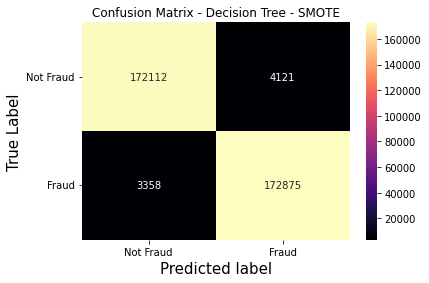

In [16]:
conf_matrix = confusion_matrix(y_test, predictions)
print(conf_matrix)
matrix_df = pd.DataFrame(conf_matrix)

ax = plt.axes()
sns.heatmap(matrix_df, annot=True, fmt="g", ax=ax, cmap="magma")
ax.set_title('Confusion Matrix - Decision Tree - SMOTE')
ax.set_xlabel("Predicted label", fontsize =15)
ax.set_xticklabels(['Not Fraud', 'Fraud'])
ax.set_ylabel("True Label", fontsize=15)
ax.set_yticklabels(['Not Fraud', 'Fraud'], rotation = 0)
plt.show()

[[170669   1691]
 [  1503 171488]]


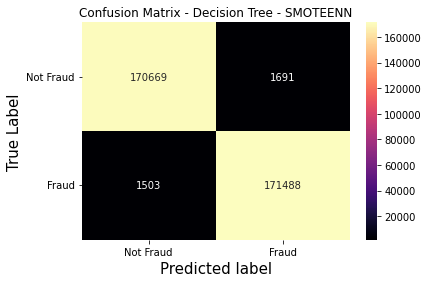

In [17]:
conf_matrix_smenn = confusion_matrix(y_test_smenn, predictions_smenn)
print(conf_matrix_smenn)
matrix_df_smenn = pd.DataFrame(conf_matrix_smenn)

ax = plt.axes()
sns.heatmap(matrix_df_smenn, annot=True, fmt="g", ax=ax, cmap="magma")
ax.set_title('Confusion Matrix - Decision Tree - SMOTEENN')
ax.set_xlabel("Predicted label", fontsize =15)
ax.set_xticklabels(['Not Fraud', 'Fraud'])
ax.set_ylabel("True Label", fontsize=15)
ax.set_yticklabels(['Not Fraud', 'Fraud'], rotation = 0)
plt.show()

In [18]:
print(classification_report(y_test, predictions))
print("\n", classification_report(y_test_smenn, predictions_smenn))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98    176233
           1       0.98      0.98      0.98    176233

    accuracy                           0.98    352466
   macro avg       0.98      0.98      0.98    352466
weighted avg       0.98      0.98      0.98    352466


               precision    recall  f1-score   support

           0       0.99      0.99      0.99    172360
           1       0.99      0.99      0.99    172991

    accuracy                           0.99    345351
   macro avg       0.99      0.99      0.99    345351
weighted avg       0.99      0.99      0.99    345351



In [19]:
print(f"Accuracy: {accuracy_score(y_test, predictions) * 100}%")
print(f"Accuracy: {accuracy_score(y_test_smenn, predictions_smenn) * 100}%")

Accuracy: 97.87809320615321%
Accuracy: 99.07514383916653%
